##  Unsupervised Learning Technique 

### Clustering 
#### K-Means

In [22]:
# creating test dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [11]:
X,Y = make_blobs(n_samples = 500,centers=8,random_state=12)

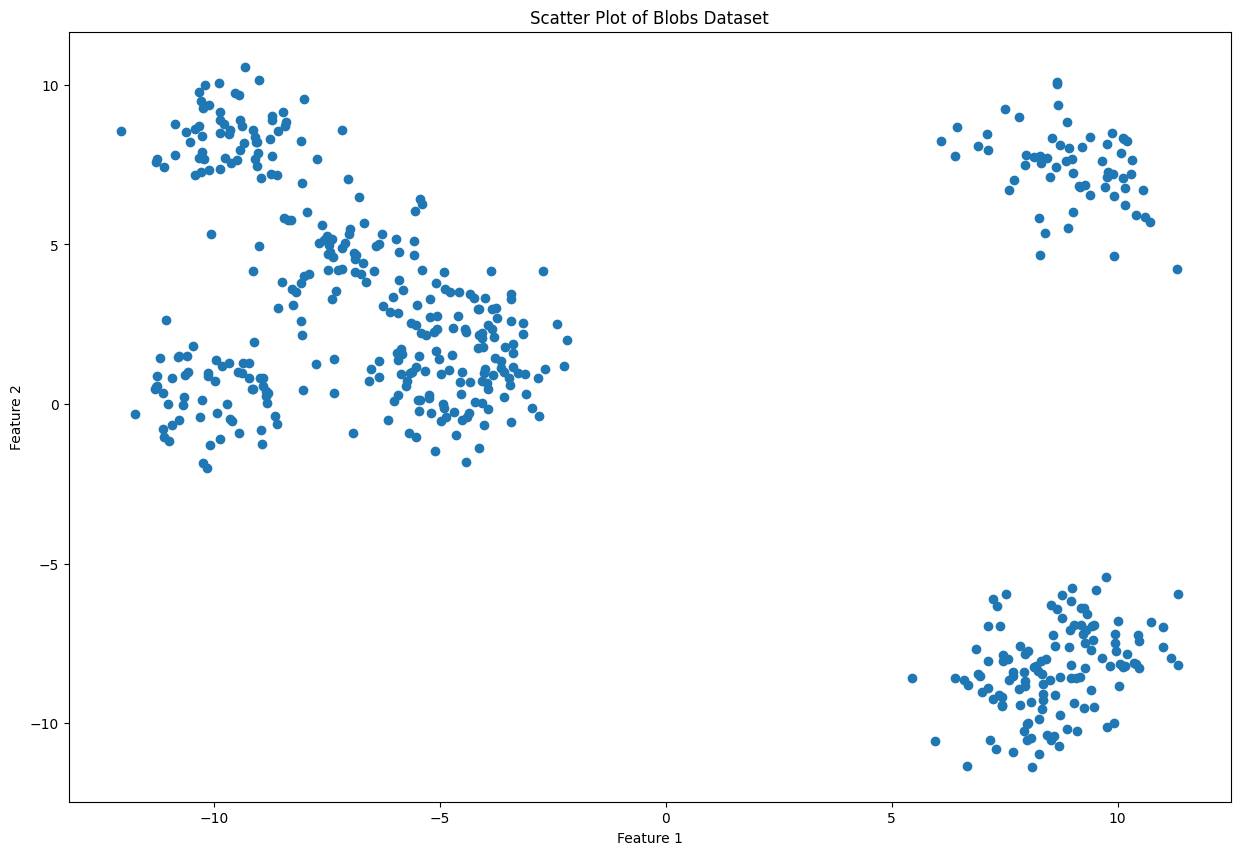

In [16]:
plt.figure(figsize=(15, 10)) 
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Blobs Dataset")
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
k=8
kmeans = KMeans(n_clusters=k)
y_predict = kmeans.fit(X)

In [20]:
kmeans.cluster_centers_

array([[-4.40962802,  2.79407671],
       [ 9.47401647, -7.17056271],
       [ 8.98097311,  7.38720958],
       [-4.69032008,  0.4333762 ],
       [-9.57192409,  8.40490893],
       [-9.86750064,  0.36813093],
       [ 7.97471549, -9.20613402],
       [-7.26175173,  4.75436834]])

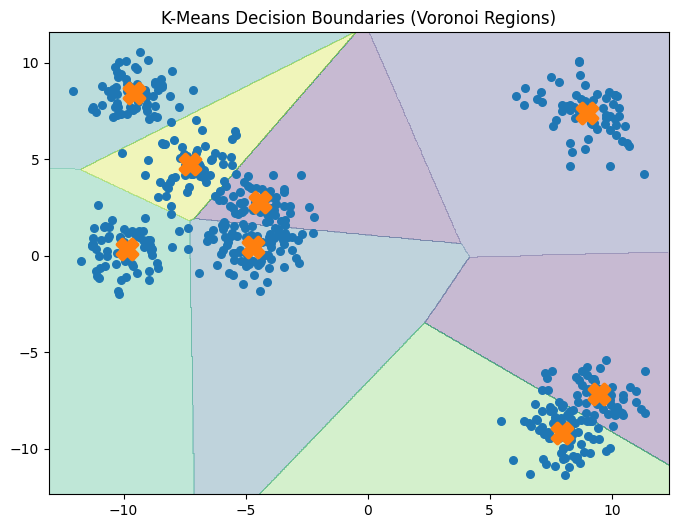

In [23]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 800),
    np.linspace(y_min, y_max, 800)
)

# 4. Predict cluster for every point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plot decision regions (Voronoi)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)   # decision boundaries

# 6. Plot original points
plt.scatter(X[:, 0], X[:, 1], s=30)

# 7. Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='X', s=200, linewidths=3)

plt.title("K-Means Decision Boundaries (Voronoi Regions)")
plt.show()

In [24]:
# Distance of Each cluster from other cluster
kmeans.transform(X)

array([[ 2.09240523, 16.09014299, 15.0955701 , ...,  5.32233638,
        15.97760036,  4.86869827],
       [ 2.9903405 , 15.13826889, 14.96600359, ...,  5.94805273,
        14.96225872,  5.92975428],
       [16.23902971,  0.85064438, 14.07857262, ..., 19.93125338,
         2.6396812 , 19.69920085],
       ...,
       [ 9.24794906, 26.11574915, 19.35641039, ...,  9.6445727 ,
        26.44560183,  6.01733884],
       [18.76670258,  3.0818561 , 17.61751473, ..., 21.72928614,
         1.52281231, 22.187879  ],
       [ 9.10006916, 25.91993674, 19.06093504, ...,  9.68921754,
        26.27357427,  5.91942282]], shape=(500, 8))

In [32]:
#finding optimal number of clusters using silhoute score
from sklearn.metrics import silhouette_score


score = silhouette_score(X,kmeans.labels_)
print("Silhouette Score :", score)


Silhouette Score : 0.5214020286223706


K = 2, Silhouette Score = 0.6612
K = 3, Silhouette Score = 0.7582
K = 4, Silhouette Score = 0.6235
K = 5, Silhouette Score = 0.6588
K = 6, Silhouette Score = 0.5510
K = 7, Silhouette Score = 0.5558
K = 8, Silhouette Score = 0.5190
K = 9, Silhouette Score = 0.4873


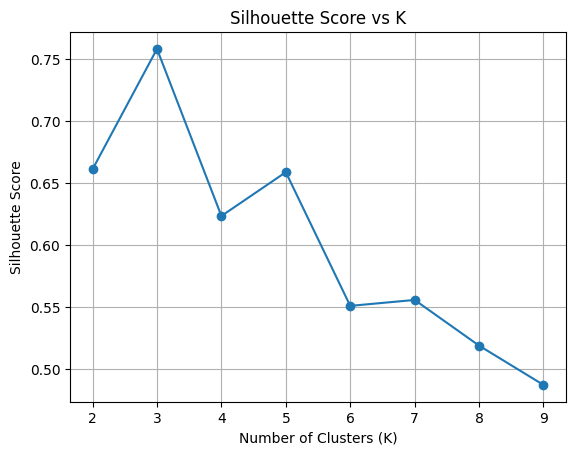

In [33]:
# Silhoutte score for different number of clusters
sil_scores = []
K_values = range(2, 10)   # silhouette requires K >= 2

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score:.4f}")

# Plot
plt.plot(K_values, sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()

### Image Segmentation


#### Color Segmentation

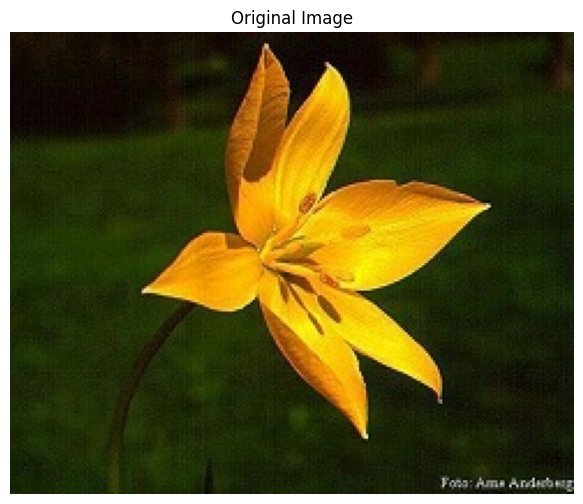

In [43]:
from matplotlib.image import imread

image = imread('./images/flower.jpg')
image.shape

import matplotlib.pyplot as plt

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # hide axes
plt.title("Original Image")
plt.show()

In [47]:
#flattering the pixels into a 1d array of 3 values RGB , eg [[1,212,12],[123,123,12]] like this . It converts the all 244 rows into a 1 single row

X = image.reshape(-1,3)
X.shape



(48800, 3)

In [55]:
kmeans = KMeans(n_clusters = 1).fit(X)


In [56]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [60]:
# import matplotlib.pyplot as plt

# # Display the image
# plt.figure(figsize=(8, 6))
# plt.imshow(segmented_img)
# plt.axis('off')  # hide axes
# plt.title("Segmented Image")
# plt.show()